### Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv("D:/dinsha/3 SEM/ML 2/upasana Proj/data/train-data.csv")
test = pd.read_csv("D:/dinsha/3 SEM/ML 2/upasana Proj/data/test-data.csv")

In [7]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
train.shape

(6019, 14)

### unique values of Categorical Features

In [7]:
train['Location'].unique()
train['Transmission'].unique()
train['Owner_Type'].unique()
train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

### Data Cleaning

In [20]:
train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Ignored New_Price as there are many cell which contains NULL value in this column.That is majority of the new price values were missing

In [21]:
train.drop('New_Price', inplace=True, axis=1)

In [22]:
train = train.dropna()

In [24]:
train.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [23]:
train.shape

(5975, 13)

In [25]:
train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [26]:
train['Price'].describe()

count    5975.000000
mean        9.501647
std        11.205736
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

### EDA

<AxesSubplot:title={'center':'Count of Lisitngs by Year of Manufacture'}>

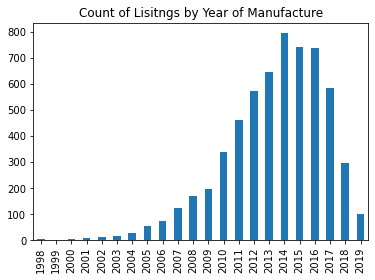

In [32]:
train['Year'].value_counts().sort_index().plot(kind="bar", title="Count of Lisitngs by Year of Manufacture")

In [34]:
train['Location'].value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

Only related to indian states and major business comes from:

Mumbai        
Hyderabad     
Kochi         
Coimbatore 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

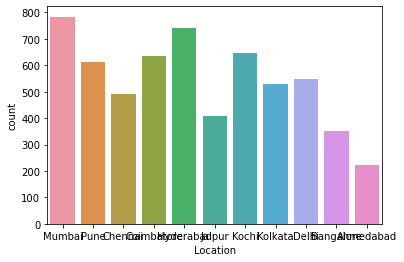

In [31]:
sns.countplot(train['Location'])

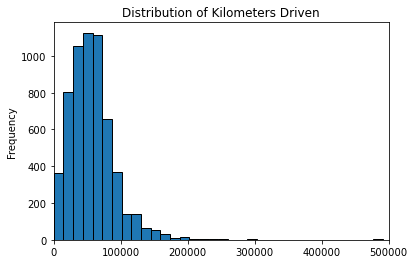

In [33]:
train['Kilometers_Driven'].astype(int).plot(
    kind="hist", bins=450, edgecolor="black", title="Distribution of Kilometers Driven"
)
plt.xlim([-5, 500000])
plt.show()

Majority of the cars are less than 2,00,000 KMs.

In [ ]:
preowned_cars_df['Fuel_Type'].value_counts()

Majority of the cars are of Diesel and Petrol, alternative fuels make up a very small market share.

In [ ]:
preowned_cars_df['Owner_Type'].value_counts()

Very little contribution from Fourth and above owners of the car.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='Transmission', ylabel='count'>

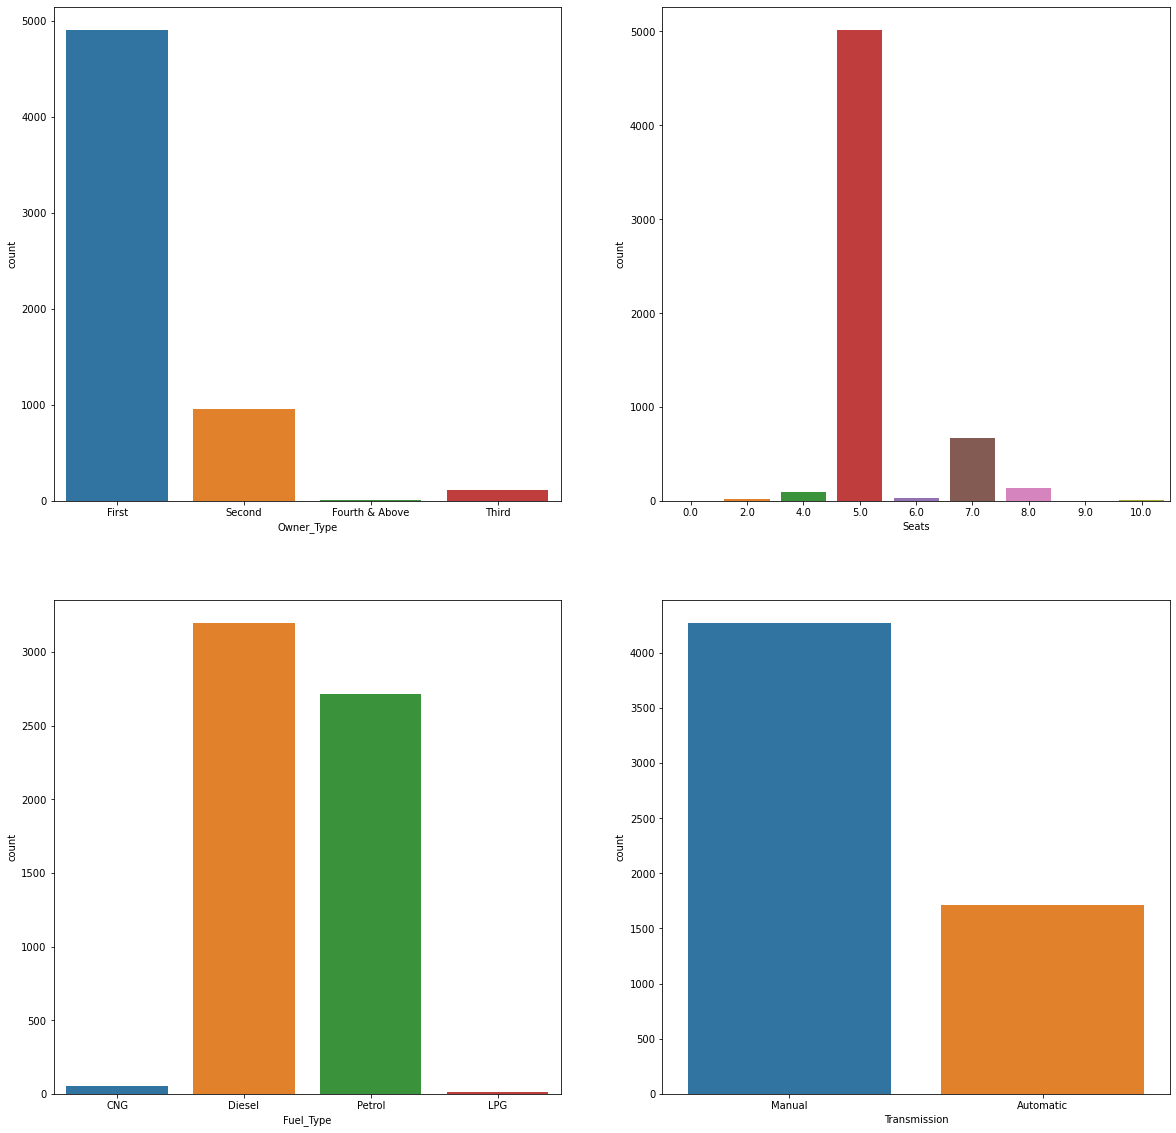

In [30]:
#  we can do the count plots
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 20))
sns.countplot(train['Owner_Type'], ax = axes[0][0])
sns.countplot(train['Seats'], ax = axes[0][1])
sns.countplot(train['Fuel_Type'], ax = axes[1][0])
sns.countplot(train['Transmission'], ax = axes[1][1])

In [35]:
train['Name'].value_counts().head(30)

Mahindra XUV500 W8 2WD              49
Maruti Swift VDI                    45
Honda City 1.5 S MT                 34
Maruti Swift Dzire VDI              34
Maruti Swift VDI BSIV               31
Maruti Ritz VDi                     30
Hyundai i10 Sportz                  30
Toyota Fortuner 3.0 Diesel          29
Hyundai Grand i10 Sportz            27
Honda Amaze S i-Dtech               27
Maruti Ertiga VDI                   25
Honda Brio S MT                     25
Honda City 1.5 V MT                 24
Hyundai Verna 1.6 SX                23
Maruti Wagon R VXI                  23
Maruti Wagon R LXI                  22
Maruti Alto LXi                     21
BMW 3 Series 320d                   20
Maruti Alto 800 LXI                 20
Hyundai EON Era Plus                20
Maruti Ertiga ZDI                   20
Skoda Superb Elegance 1.8 TSI AT    20
Toyota Fortuner 4x2 AT              19
Maruti Celerio VXI AT               19
Hyundai i10 Magna 1.2               19
Renault KWID RXT         

In [11]:
def clean_name(x):
    x_list = x.split(" ")
    x_new = x_list[:-1]
    x_new = " ".join(x_new)
    return x_new

In [12]:
train['Name Cleaned'] = train["Name"].apply(lambda x: clean_name(x))

In [13]:
len(set(train['Name Cleaned']))

1370

In [14]:
train['Name Cleaned'].value_counts().head(30)

Maruti Swift Dzire             120
Maruti Swift                    84
Maruti Ritz                     62
Hyundai i10                     62
Mahindra XUV500 W8              62
Maruti Ertiga                   58
Honda Amaze S                   54
Ford Figo Diesel                51
Maruti Wagon R                  49
Hyundai Grand i10               47
Hyundai i20 1.2                 46
Honda City 1.5 S                39
Hyundai Santro Xing             37
Honda City i VTEC               37
Hyundai i10 Magna               36
Toyota Fortuner 4x2             35
Hyundai Verna 1.6               34
Maruti Wagon R LXI              34
Maruti Swift VDI                33
Honda City 1.5 V                33
Volkswagen Vento Diesel         33
Hyundai i10 Sportz              30
Honda City i DTEC               30
Volkswagen Polo 1.2 MPI         30
Toyota Fortuner 3.0             29
Hyundai Grand i10 1.2 Kappa     28
Maruti Alto                     28
Hyundai Grand i10 CRDi          28
Renault Duster 110PS

In [8]:
train['Brand Name'] = train['Name'].apply(lambda x: x.split(" ")[0])

In [9]:
train['Brand Name'].value_counts().rename("Freq").reset_index().assign(
    percentage=lambda x: x['Freq']/train.shape[0]
).assign(
    cumulative_percentage = lambda x: x['percentage'].cumsum()
)

,index,Freq,percentage,cumulative_percentage
0,Maruti,1211,0.201196,0.201196
1,Hyundai,1107,0.183918,0.385114
2,Honda,608,0.101013,0.486127
3,Toyota,411,0.068284,0.554411
4,Mercedes-Benz,318,0.052833,0.607244
5,Volkswagen,315,0.052334,0.659578
6,Ford,300,0.049842,0.709420
7,Mahindra,272,0.045190,0.754610
8,BMW,267,0.044360,0.798970
9,Audi,236,0.039209,0.838179


Maruti and HYUNDAI are market leaders with 19% stake.

In [28]:
train['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

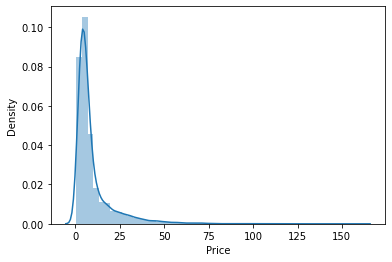

In [30]:
sns.distplot(train['Price'])

In [32]:
#skewness and kurtosis
print("Skewness: %f" % train['Price'].skew())
print("Kurtosis: %f" % train['Price'].kurt())

Skewness: 3.335232
Kurtosis: 17.092202


We can observe that the distribution of prices shows a high positive skewness 
to the left (skew > 1).

In [ ]:
### Using flask application for UI development

Here we are using the Flask micro-framework. Flask defines a set of constraints for the web app to send and receive data.

In [ ]:
### Here am about to deploy an ML model for used car price prediction and analysis using flask for UI development.

In [35]:
from flask import Flask, render_template, request
import pickle
import requests
import numpy as np